## PyTorch Tutorial 07 - Linear Regression

### Steps in implementation

1. Design model (input size, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
- Forward pass: compute y_pred
- Backward pass: gradients
- Update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [20]:
# Prepare random data using datasets from sklearn

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features=1, noise=20, random_state=1)
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [21]:
# Next we convert the numpy arrays into torch tensors and reshape them as they are currently just a single row

X = torch.from_numpy(X_numpy.astype(np.float32))

y = torch.from_numpy(y_numpy.astype(np.float32))
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100]))

In [22]:
y = y.view(y.shape[0], 1)
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [23]:
n_samples, n_features = X.shape

input_size = n_features
output_size = 1

# Create model
model = nn.Linear(input_size, output_size)

In [24]:
learning_rate = 0.01

# Loss and optimizer
loss = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [28]:
X_test = torch.tensor([5], dtype=torch.float32)
print("Prediction before training f(5) = {}".format(model(X_test).item()))

Prediction before training f(5) = 333.4825439453125


In [26]:
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)

    # loss
    l = loss(y_predicted, y)

    # backward pass
    l.backward()

    # update
    optimizer.step()

    # Zero grad
    optimizer.zero_grad()

    if epoch%5==0:
        [w,b] = model.parameters()
        print("Epoch = {}; Loss = {}; Weight = {}".format(epoch+1, l.item(), w[0][0]))

Epoch = 1; Loss = 5697.56005859375; Weight = 1.6505227088928223
Epoch = 6; Loss = 4899.14697265625; Weight = 7.836489200592041
Epoch = 11; Loss = 4220.51416015625; Weight = 13.5460786819458
Epoch = 16; Loss = 3643.518798828125; Weight = 18.816261291503906
Epoch = 21; Loss = 3152.796875; Weight = 23.681110382080078
Epoch = 26; Loss = 2735.332763671875; Weight = 28.172035217285156
Epoch = 31; Loss = 2380.095703125; Weight = 32.31798553466797
Epoch = 36; Loss = 2077.73193359375; Weight = 36.14564895629883
Epoch = 41; Loss = 1820.307861328125; Weight = 39.67963409423828
Epoch = 46; Loss = 1601.0919189453125; Weight = 42.94263458251953
Epoch = 51; Loss = 1414.370361328125; Weight = 45.95556640625
Epoch = 56; Loss = 1255.2911376953125; Weight = 48.73772430419922
Epoch = 61; Loss = 1119.73388671875; Weight = 51.30689239501953
Epoch = 66; Loss = 1004.1972045898438; Weight = 53.67948532104492
Epoch = 71; Loss = 905.7045288085938; Weight = 55.870635986328125
Epoch = 76; Loss = 821.7260131835938;

In [29]:
print("Prediction after training f(5) = {}".format(model(X_test).item()))

Prediction after training f(5) = 333.4825439453125


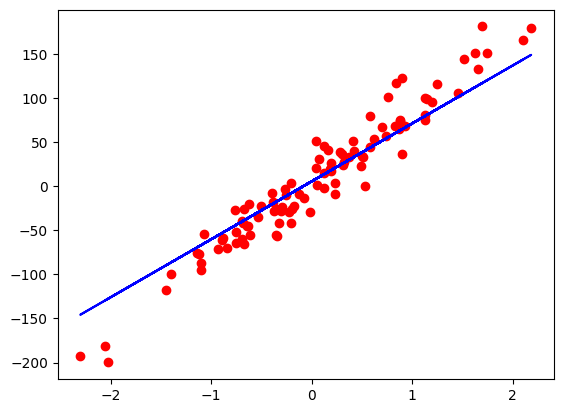

In [38]:
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()